## Exploratory Data Analysis - Grammys dataset

<div class="alert alert-block alert-warning">
<b>!</b> The main purpose of these EDAs is to identify what kind of data transformations are needed to manipulate the data in the creation of a Data Pipeline. The transformations evidenced will be tested, they will not be implemented directly from the EDAs.
</div>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pylab as plt
plt.style.use('ggplot')
pd.set_option('display.max_columns', 100) 

<div class="alert alert-block alert-info">
<b>NOTE:</b>  "pd.set_option('display.max_columns', 100)" will help us to see all columns of the dataframe when we print it.
</div>

### Data Understanding

#### Let´s read the dataset

In [4]:
df=pd.read_csv("../data/the_grammy_awards.csv")
df.head(5)

,year,title,published_at,updated_at,category,nominee,artist,workers,img,winner
0,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Record Of The Year,Bad Guy,Billie Eilish,"Finneas O'Connell, producer; Rob Kinelski & Fi...",https://www.grammy.com/sites/com/files/styles/...,True
1,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Record Of The Year,"Hey, Ma",Bon Iver,"BJ Burton, Brad Cook, Chris Messina & Justin V...",https://www.grammy.com/sites/com/files/styles/...,True
2,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Record Of The Year,7 rings,Ariana Grande,"Charles Anderson, Tommy Brown, Michael Foster ...",https://www.grammy.com/sites/com/files/styles/...,True
3,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Record Of The Year,Hard Place,H.E.R.,"Rodney “Darkchild” Jerkins, producer; Joseph H...",https://www.grammy.com/sites/com/files/styles/...,True
4,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Record Of The Year,Talk,Khalid,"Disclosure & Denis Kosiak, producers; Ingmar C...",https://www.grammy.com/sites/com/files/styles/...,True


#### Period of time for which there is a record in year

In [796]:
min_year = df['year'].min()
max_year= df['year'].max()

print(f"The minimum year that we have registered is {min_year} and the maximum is {max_year}")

The minimum year that we have registered is 1958 and the maximum is 2019


#### What do we have in the title column?

In [7]:
unique_titles = df['title'].unique()[:10]
for title in unique_titles:
    print(title)

62nd Annual GRAMMY Awards  (2019)
61st Annual GRAMMY Awards  (2018)
60th Annual GRAMMY Awards  (2017)
59th Annual GRAMMY Awards  (2016)
58th Annual GRAMMY Awards  (2015)
57th Annual GRAMMY Awards  (2014)
56th Annual GRAMMY Awards  (2013)
55th Annual GRAMMY Awards  (2012)
54th Annual GRAMMY Awards  (2011)
53rd Annual GRAMMY Awards  (2010)


We have the specific event name numbered from the first (1st) to the one held in 2019 which is the 62st event, along with the year in which it was held in parentheses.


#### Period of time for which there is a record in the dates (published_at and updated_at)

In [798]:
min_publised = df['published_at'].min()
max_published= df['published_at'].max()

print(f"The minimum date for published the records that we have registered is {min_publised} and the maximum is {max_published}")

The minimum date for published the records that we have registered is 2017-11-28T00:03:45-08:00 and the maximum is 2020-05-19T05:10:28-07:00


In [799]:
min_updated = df['updated_at'].min()
max_updated= df['updated_at'].max()

print(f"The minimum date for updated the records that we have registered is {min_updated} and the maximum is {max_updated}")

The minimum date for updated the records that we have registered is 2017-11-28T00:03:45-08:00 and the maximum is 2020-09-01T12:16:40-07:00


#### What do we have on the category column?

In [8]:
unique_categories = df['category'].unique()[:10]
for category in unique_categories:
    print(category)

Record Of The Year
Album Of The Year
Song Of The Year
Best New Artist
Best Pop Solo Performance
Best Pop Duo/Group Performance
Best Traditional Pop Vocal Album
Best Pop Vocal Album
Best Dance Recording
Best Dance/Electronic Album


Category for which nominated.

#### Checkin the winner column

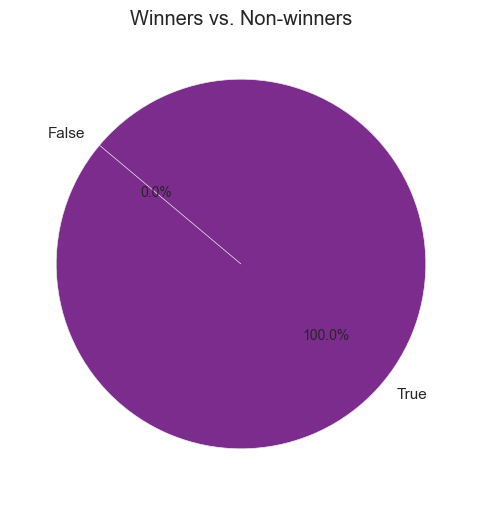

In [801]:
true_cnt = df['winner'].sum()
false_cnt = len(df) - true_cnt

plt.figure(figsize=(6, 6)) 
labels = ['True', 'False']
data = [true_cnt, false_cnt]

colors = ['#7C2C8C', '#E76FA4']
plt.pie(data, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title("Winners vs. Non-winners")
plt.show()

#[7] reference

We notice that we have a percentage of 100% winners, so the column does not make sense at the moment. To correct this, we will see how many winners there were per category per year, so if we see that there was more than one winner per category per year, we will know that the column is not really showing if the nominee was a winner or not.

#### Number of winners per category per year

In [9]:
winners_by_year_category = df[df['winner'] == True].groupby(['year', 'category']).size().unstack(fill_value=0)

winners_by_year_category[:15]


category,Album Of Best Original Score Written For A Motion Picture Or A Television Special,Album Of Best Original Score Written For A Motion Picture Or Television Special,Album Of The Year,Album Of The Year (Other Than Classical),Album Of The Year - Classical,Album Of The Year -- Classical,"Album Of The Year, Classical",Best Accompaniment Arrangement For Vocalist(s) Or Instrumentalist(s),Best Album Cover,Best Album Cover (Other Than Classical),Best Album Cover - Classical,Best Album Cover - Graphic Arts,Best Album Cover - Other Than Classical,Best Album Cover - Photography,"Best Album Cover, Graphic Arts","Best Album Cover, Photography",Best Album Cover- Other Than Classical,Best Album Created For Children,Best Album For Children,Best Album Notes,Best Album Notes (Classical),Best Album Notes - Classical,"Best Album Notes, Classical",Best Album Of Original Instrumental Background Score Written For A Motion Picture Or Television,Best Album Of Original Score Written For A Motion Picture Or A Television Special,Best Album Of Original Score Written For A Motion Picture Or Television Special,Best Album Or Original Instrumental Background Score Written For A Motion Picture Or Television,Best Album Package,Best Alternative Music Album,Best Alternative Music Performance,Best American Roots Performance,Best American Roots Song,Best Americana Album,Best Arrangement,Best Arrangement Accompanying A Vocalist Or Instrumentalist,Best Arrangement Accompanying Vocal(s),Best Arrangement Accompanying Vocalist(s),Best Arrangement Accompanying Vocalist(s) Or Instrumentalist(s),Best Arrangement Accompanying Vocalists,Best Arrangement Accompanying Vocals,Best Arrangement For Voices,"Best Arrangement For Voices (Duo, Group Or Chorus)",Best Arrangement On An Instrumental,Best Arrangement On An Instrumental Recording,"Best Arrangement, Instrumental or A Cappella","Best Arrangement, Instruments and Vocals",Best Background Arrangement,Best Background Arrangement (Behind vocalist or instrumentalist),Best Banda Album,Best Banda Or Norteño Album,...,Best Tejano Performance,Best Traditional Blues Album,Best Traditional Blues Recording,Best Traditional Folk Album,Best Traditional Folk Recording,Best Traditional Gospel Album,Best Traditional Pop Performance,Best Traditional Pop Vocal Album,Best Traditional Pop Vocal Performance,Best Traditional R&B Performance,Best Traditional R&B Vocal Album,Best Traditional R&B Vocal Performance,Best Traditional Soul Gospel Album,Best Traditional Soul Gospel Performance,Best Traditional Tropical Latin Album,Best Traditional Tropical Latin Performance,Best Traditional World Music Album,Best Tropical Latin Album,Best Tropical Latin Performance,Best Urban Contemporary Album,Best Urban/Alternative Performance,Best Video Album,"Best Video, Short Form",Best Vocal Arrangement For Two Or More Voices,"Best Vocal Performance Album, Female","Best Vocal Performance Album, Male","Best Vocal Performance Single Record Or Track, Female","Best Vocal Performance Single Record Or Track, Male","Best Vocal Performance, Female","Best Vocal Performance, Male",Best Vocal Soloist Performance,Best Vocal Soloist Performance (With Or Without Orchestra),"Best Vocal Soloist Performance, Classical",Best World Music Album,Best Zydeco Or Cajun Music Album,Classical Album Of The Year,Classical Producer Of The Year,Most Promising New Classical Recording Artist,Producer Of The Year,Producer Of The Year (Non Classical),Producer Of The Year (Non-Classical),"Producer Of The Year, (Non Classical)","Producer Of The Year, Classical","Producer Of The Year, Non-Classical",Record Of The Year,"Remixer Of The Year, Non-Classical","Remixer Of The Year, Non-classical","Remixer of the Year, Non-Classical",Song Of The Year,Video Of The Year
year,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1958,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,

This is a lot of data, very difficult to read as a df or as a plot, so in order to know if there is more than one winner per category per year it was decided to use the following form:

In [803]:
if (winners_by_year_category.values > 1).any():
    print("yes, there is more than one winner per category per year.")
else:
    print("no, there is not more than one winner per category per year.")

yes, there is more than one winner per category per year.


In fact, the column does not indicate whether the nominee was a winner or not, it just seems to highlight that the person or production was indeed nominated for a Grammy.

In [804]:
df.columns

Index(['year', 'title', 'published_at', 'updated_at', 'category', 'nominee',
       'artist', 'workers', 'img', 'winner'],
      dtype='object')

**Column description:**<br>
According to my criteria, because in the dataset information they do not give a detailed description of the columns.<br>

* *year* - Nomination year (1958-2019).
* *title* - Specific event name numbered from the first (1st) to the one held in 2019 which is the 62st event, along with the year in which it was held in parentheses.
* *published_at* - Year in which the record was published.
* *updated_at* - Year in which the record was updated.
* *category* - Category for which nominated.
* *nominee* - Artist, album, song or name of other nominees.
* *artist* - Artist of the nominated production.
* *workers* - Others involved in the nominated production.
* *img* - Link to a page of the grammys (the tested links lead to the same page even though they look different).
* *winner* - Column that should show if the nominee was a winner or not, but as we could observe all data are true, so we can estimate that it is really if the person was nominated or not. At the moment it does not make sense because having 100% true does not contribute much, but at the moment of doing the merge in the airflow pipeline this column could be of help.

[6] reference



In [805]:
df.shape

(4810, 10)

We can see that with the raw data we have 4810 rows and 10 columns, which were previously described.

In [806]:
df.dtypes

year             int64
title           object
published_at    object
updated_at      object
category        object
nominee         object
artist          object
workers         object
img             object
winner            bool
dtype: object

According to the types for each column, in the raw dataframe we got: <br>
1 interger <br>
1 boolean <br>
8 object type

<div class="alert alert-block alert-info">
<b>NOTE:</b> The actual transformations would be performed when the pipeline is executed in airflow. All transformations that will be evidenced in the EDAs will be examples/tests of data manipulation and transformations that should be really done in the transformation part of the data pipeline.  </div>

####  Check NA values:

In [807]:
df.isna().sum()

year               0
title              0
published_at       0
updated_at         0
category           0
nominee            6
artist          1840
workers         2190
img             1367
winner             0
dtype: int64

#### Handle the Na values

In the case of "img" I consider that it is not a necessary column so it will be dropped.<br>
In the case of artists I will try to fill the nulls with the information provided by other columns, like workers or nominee. Those rows that could not be fill will be dropped. <br>
And, those nulls that are in workers can be filled by a "NO workers specify", however, if the row has a null in artists too (after the transformation in that column) would be dropped.

Then... dropping 'img':

In [808]:
df = df.drop(['img'], axis=1)
df.head(5)


,year,title,published_at,updated_at,category,nominee,artist,workers,winner
0,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Record Of The Year,Bad Guy,Billie Eilish,"Finneas O'Connell, producer; Rob Kinelski & Finneas O'Connell, engineers/mixers; John Greenham, mastering engineer",True
1,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Record Of The Year,"Hey, Ma",Bon Iver,"BJ Burton, Brad Cook, Chris Messina & Justin Vernon, producers; BJ Burton, Zach Hanson & Chris Messina, engineers/mixers; Greg Calbi, mastering engineer",True
2,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Record Of The Year,7 rings,Ariana Grande,"Charles Anderson, Tommy Brown, Michael Foster & Victoria Monet, producers; Serban Ghenea, John Hanes, Billy Hickey & Brendan Morawski, engineers/mixers; Randy Merrill, mastering engineer",True
3,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Record Of The Year,Hard Place,H.E.R.,"Rodney “Darkchild” Jerkins, producer; Joseph Hurtado, Jaycen Joshua, Derek Keota & Miki Tsutsumi, engineers/mixers; Colin Leonard, mastering engineer",True
4,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Record Of The Year,Talk,Khalid,"Disclosure & Denis Kosiak, producers; Ingmar Carlson, Jon Castelli, Josh Deguzman, John Kercy, Denis Kosiak, Guy Lawrence & Michael Romero, engineers/mixers; Dale Becker, mastering engineer",True


Filling nulls in artists:

In [11]:
#let´s see what kind of data do we have on the workers column
unique_workers = df['workers'].unique()[:10]
for worker in unique_workers:
    print(worker)


Finneas O'Connell, producer; Rob Kinelski & Finneas O'Connell, engineers/mixers; John Greenham, mastering engineer
BJ Burton, Brad Cook, Chris Messina & Justin Vernon, producers; BJ Burton, Zach Hanson & Chris Messina, engineers/mixers; Greg Calbi, mastering engineer
Charles Anderson, Tommy Brown, Michael Foster & Victoria Monet, producers; Serban Ghenea, John Hanes, Billy Hickey & Brendan Morawski, engineers/mixers; Randy Merrill, mastering engineer
Rodney “Darkchild” Jerkins, producer; Joseph Hurtado, Jaycen Joshua, Derek Keota & Miki Tsutsumi, engineers/mixers; Colin Leonard, mastering engineer
Disclosure & Denis Kosiak, producers; Ingmar Carlson, Jon Castelli, Josh Deguzman, John Kercy, Denis Kosiak, Guy Lawrence & Michael Romero, engineers/mixers; Dale Becker, mastering engineer
Andrew "VoxGod" Bolooki, Jocelyn “Jozzy” Donald & YoungKio, producers; Andrew "VoxGod" Bolooki, Cinco & Joe Grasso, engineers/mixers; Eric Lagg, mastering engineer
Ricky Reed & Tele, producers; Chris Galla

What we can see is that some of the worker rows have the name of the artist in parentheses, so this could be our first filter to fill the artists column. Later we will look for some other parameter.

<div class="alert alert-block alert-warning">
<b>!</b> I assume that absolutely all the rows fulfill the condition that if there is parentheses the information between them will be the name of the artist.
</div>

First of all lets see the null rows in 'artists' where 'workers' has parenthesis  on it:

In [810]:
df.loc[df['artist'].isnull() & df['workers'].str.contains(r'\(.*\)')][:5]

,year,title,published_at,updated_at,category,nominee,artist,workers,winner
16,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Song Of The Year,Bad Guy,NaN,"Billie Eilish O'Connell & Finneas O'Connell, songwriters (Billie Eilish)",True
17,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Song Of The Year,Always Remember Us This Way,NaN,"Natalie Hemby, Lady Gaga, Hillary Lindsey & Lori McKenna, songwriters (Lady Gaga)",True
18,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Song Of The Year,Bring My Flowers Now,NaN,"Brandi Carlile, Phil Hanseroth, Tim Hanseroth & Tanya Tucker, songwriters (Tanya Tucker)",True
19,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Song Of The Year,Hard Place,NaN,"Ruby Amanfu, Sam Ashworth, D. Arcelious Harris, H.E.R. & Rodney Jerkins, songwriters (H.E.R.)",True
20,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Song Of The Year,Lover,NaN,"Taylor Swift, songwriter (Taylor Swift)",True


Now, extract the artist information in parenthesis and fill the nulls in the column 'artist':

In [811]:
import re #Regular Expressions

condition = df['artist'].isnull() & df['workers'].str.contains(r'\(.*\)')

df.loc[condition, 'artist'] = df.loc[condition, 'workers'].apply(lambda x: re.search(r'\((.*?)\)', x).group(1) if isinstance(x, str) and re.search(r'\((.*?)\)', x) else None)

#[8] reference

<div class="alert alert-block alert-info">
<b>NOTE:</b> 're' is the Python regular expression module that allows you to search, parse and manipulate text patterns. Regular expressions are useful for advanced search and string manipulation tasks. </div>

Checking that the rows previously observed, wich had nulls in the 'artists' column, are now filled:

In [812]:
df.iloc[16:21]

,year,title,published_at,updated_at,category,nominee,artist,workers,winner
16,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Song Of The Year,Bad Guy,Billie Eilish,"Billie Eilish O'Connell & Finneas O'Connell, songwriters (Billie Eilish)",True
17,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Song Of The Year,Always Remember Us This Way,Lady Gaga,"Natalie Hemby, Lady Gaga, Hillary Lindsey & Lori McKenna, songwriters (Lady Gaga)",True
18,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Song Of The Year,Bring My Flowers Now,Tanya Tucker,"Brandi Carlile, Phil Hanseroth, Tim Hanseroth & Tanya Tucker, songwriters (Tanya Tucker)",True
19,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Song Of The Year,Hard Place,H.E.R.,"Ruby Amanfu, Sam Ashworth, D. Arcelious Harris, H.E.R. & Rodney Jerkins, songwriters (H.E.R.)",True
20,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Song Of The Year,Lover,Taylor Swift,"Taylor Swift, songwriter (Taylor Swift)",True


Cheking how many NA do we have now:

In [813]:
df.isna().sum()

year               0
title              0
published_at       0
updated_at         0
category           0
nominee            6
artist           474
workers         2190
winner             0
dtype: int64

We have gone from 1840 nulls in the artist column to 474!!. Let's find another condition that we can use to keep filling nulls.

In [814]:
df.loc[~df['workers'].str.contains(r'\(.*\)', na= False) & df['artist'].isnull()][5:15]


,year,title,published_at,updated_at,category,nominee,artist,workers,winner
29,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Best New Artist,ROSALÍA,NaN,NaN,True
30,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Best New Artist,Tank And The Bangas,NaN,NaN,True
31,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Best New Artist,Yola,NaN,NaN,True
162,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Best Improvised Jazz Solo,Sozinho,NaN,"Randy Brecker, soloist",True
163,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Best Improvised Jazz Solo,Elsewhere,NaN,"Melissa Aldana, soloist",True
164,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Best Improvised Jazz Solo,Tomorrow Is The Question,NaN,"Julian Lage, soloist",True
165,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Best Improvised Jazz Solo,The Windup,NaN,"Branford Marsalis, soloist",True
166,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Best Improvised Jazz Solo,Sightseeing,NaN,"Christian McBride, soloist",True
187,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Best Gospel Performance/Song,Love Theory,NaN,"Kirk Franklin; Kirk Franklin, songwriter",True
188,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Best Gospel Performance/Song,Talkin' 'Bout Jesus,NaN,"Gloria Gaynor Featuring Yolanda Adams; Bryan Fowler, Gloria Gaynor & Chris Stevens, songwriters",True


I will now highlight two things I noticed. First, the rows that have nulls in both artists and workers have the artist's name in the nominee column, so we could fill in some nulls with that. On the other hand, the workers column, when it does not have parenthesis, has the names of the artists (when is more than one) separated by ";" and the title of the artists separated by "," (for example, songwriter or soloist), so the idea would be to take the first name of the person who appears and take them as the "main" artist.

<div class="alert alert-block alert-warning">
<b>!</b> I assume that absolutely all the rows fulfill the condition that I mentioned to fill as much as possible the nulls of 'artists'.
</div>

Let's see which rows have the specified condition:

In [815]:
df.loc[ df['workers'].str.contains('[;,]', na=False) & ~df['workers'].str.contains(r'\(.*\)', na=False) & df['artist'].isnull()][:5]

,year,title,published_at,updated_at,category,nominee,artist,workers,winner
162,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Best Improvised Jazz Solo,Sozinho,NaN,"Randy Brecker, soloist",True
163,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Best Improvised Jazz Solo,Elsewhere,NaN,"Melissa Aldana, soloist",True
164,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Best Improvised Jazz Solo,Tomorrow Is The Question,NaN,"Julian Lage, soloist",True
165,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Best Improvised Jazz Solo,The Windup,NaN,"Branford Marsalis, soloist",True
166,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Best Improvised Jazz Solo,Sightseeing,NaN,"Christian McBride, soloist",True


We fill artists with the information that has worker, taking the first name before a ';' or a ',', assuming that this will always be the name of the "main" artist:

In [816]:
condition= df['workers'].str.contains('[;,]', na=False) & ~df['workers'].str.contains(r'\(.*\)', na=False) & df['artist'].isnull()

df.loc[condition, 'artist'] = df.loc[condition, 'workers'].str.split('[;,]').str[0].str.strip()

Checking the changes:

In [817]:
df.iloc[162:167]

,year,title,published_at,updated_at,category,nominee,artist,workers,winner
162,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Best Improvised Jazz Solo,Sozinho,Randy Brecker,"Randy Brecker, soloist",True
163,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Best Improvised Jazz Solo,Elsewhere,Melissa Aldana,"Melissa Aldana, soloist",True
164,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Best Improvised Jazz Solo,Tomorrow Is The Question,Julian Lage,"Julian Lage, soloist",True
165,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Best Improvised Jazz Solo,The Windup,Branford Marsalis,"Branford Marsalis, soloist",True
166,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Best Improvised Jazz Solo,Sightseeing,Christian McBride,"Christian McBride, soloist",True


We can see that we were able to successfully fill more rows with the worker column, now let's see if there are still nulls and how many:

In [818]:
df.isna().sum()

year               0
title              0
published_at       0
updated_at         0
category           0
nominee            6
artist           197
workers         2190
winner             0
dtype: int64

We have gone from 474 nulls in the artist column to 197!!. Let's find another condition that we can use to keep filling nulls in 'artists'.

In [819]:
df.loc[df['artist'].isnull()][5:15]

,year,title,published_at,updated_at,category,nominee,artist,workers,winner
29,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Best New Artist,ROSALÍA,NaN,NaN,True
30,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Best New Artist,Tank And The Bangas,NaN,NaN,True
31,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Best New Artist,Yola,NaN,NaN,True
189,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Best Gospel Performance/Song,See The Light,NaN,Travis Greene Featuring Jekalyn Carr,True
190,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Best Gospel Performance/Song,Speak The Name,NaN,Koryn Hawthorne Featuring Natalie Grant,True
195,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Best Contemporary Christian Music Performance/Song,God's Not Done With You (Single Version),NaN,Tauren Wells,True
397,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Best Chamber Music/Small Ensemble Performance,Shaw: Orange,NaN,Attacca Quartet,True
398,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Best Chamber Music/Small Ensemble Performance,Cerrone: The Pieces That Fall To Earth,NaN,Christopher Rountree & Wild Up,True
399,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Best Chamber Music/Small Ensemble Performance,Freedom & Faith,NaN,PUBLIQuartet,True
400,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Best Chamber Music/Small Ensemble Performance,Perpetulum,NaN,Third Coast Percussion,True


Now there is something new that I have noticed, and it is that there are data in workers that do not have neither ';' or ',' but it is only the name of the artist (assuming that absolutely all are), therefore the rows of artists that are null can be filled with this information directly. For those rows in which worker is NA I will take the nominee data taking advantage of the fact that it is a column with very few nulls.

Keep filling 'artists' nulls with the 'workers' information:

In [820]:
df.loc[df['artist'].isnull() & ~df['workers'].isnull()]

,year,title,published_at,updated_at,category,nominee,artist,workers,winner
189,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Best Gospel Performance/Song,See The Light,NaN,Travis Greene Featuring Jekalyn Carr,True
190,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Best Gospel Performance/Song,Speak The Name,NaN,Koryn Hawthorne Featuring Natalie Grant,True
195,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Best Contemporary Christian Music Performance/Song,God's Not Done With You (Single Version),NaN,Tauren Wells,True
397,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Best Chamber Music/Small Ensemble Performance,Shaw: Orange,NaN,Attacca Quartet,True
398,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Best Chamber Music/Small Ensemble Performance,Cerrone: The Pieces That Fall To Earth,NaN,Christopher Rountree & Wild Up,True
399,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Best Chamber Music/Small Ensemble Performance,Freedom & Faith,NaN,PUBLIQuartet,True
400,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Best Chamber Music/Small Ensemble Performance,Perpetulum,NaN,Third Coast Percussion,True
401,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Best Chamber Music/Small Ensemble Performance,Rachmaninoff - Hermitage Piano Trio,NaN,Hermitage Piano Trio,True
403,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Best Classical Instrumental Solo,The Berlin Recital,NaN,Yuja Wang,True
405,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Best Classical Instrumental Solo,The Orchestral Organ,NaN,Jan Kraybill,True


In [821]:
condition = df['artist'].isnull() & ~df['workers'].isnull()

df.loc[condition, 'artist'] = df.loc[condition, 'workers']

In [822]:
list_ids = [189, 190, 195, 397, 398, 399, 400, 401, 403, 405, 726]

df.iloc[list_ids]

,year,title,published_at,updated_at,category,nominee,artist,workers,winner
189,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Best Gospel Performance/Song,See The Light,Travis Greene Featuring Jekalyn Carr,Travis Greene Featuring Jekalyn Carr,True
190,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Best Gospel Performance/Song,Speak The Name,Koryn Hawthorne Featuring Natalie Grant,Koryn Hawthorne Featuring Natalie Grant,True
195,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Best Contemporary Christian Music Performance/Song,God's Not Done With You (Single Version),Tauren Wells,Tauren Wells,True
397,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Best Chamber Music/Small Ensemble Performance,Shaw: Orange,Attacca Quartet,Attacca Quartet,True
398,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Best Chamber Music/Small Ensemble Performance,Cerrone: The Pieces That Fall To Earth,Christopher Rountree & Wild Up,Christopher Rountree & Wild Up,True
399,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Best Chamber Music/Small Ensemble Performance,Freedom & Faith,PUBLIQuartet,PUBLIQuartet,True
400,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Best Chamber Music/Small Ensemble Performance,Perpetulum,Third Coast Percussion,Third Coast Percussion,True
401,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Best Chamber Music/Small Ensemble Performance,Rachmaninoff - Hermitage Piano Trio,Hermitage Piano Trio,Hermitage Piano Trio,True
403,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Best Classical Instrumental Solo,The Berlin Recital,Yuja Wang,Yuja Wang,True
405,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Best Classical Instrumental Solo,The Orchestral Organ,Jan Kraybill,Jan Kraybill,True


In [823]:
df.isna().sum()

year               0
title              0
published_at       0
updated_at         0
category           0
nominee            6
artist           186
workers         2190
winner             0
dtype: int64

There were not many nulls that could be filled with this condition, however it was a contribution. Now we are going to analyze if with the nominees we can fill the missing artists:

In [824]:
df2 = df.loc[df['artist'].isnull()]
df2['category'].unique()

array(['Best New Artist', 'Producer Of The Year, Non-Classical',
       'Producer Of The Year, Classical',
       'Remixer of the Year, Non-Classical',
       'Remixer Of The Year, Non-Classical',
       'Best Small Ensemble Performance (With Or Without Conductor)',
       'Remixer Of The Year, Non-classical',
       'Best Classical Vocal Performance', 'Producer Of The Year',
       'Classical Producer Of The Year',
       'Producer Of The Year (Non-Classical)',
       'Producer Of The Year (Non Classical)',
       'Best Classical Vocal Soloist',
       'Producer Of The Year, (Non Classical)',
       'Best Classical Vocal Soloist Performance',
       'Best Classical Performance - Instrumental Soloist Or Soloists (With Or Without Orchestra)',
       'Best New Classical Artist', 'Best New Artist Of The Year',
       'Best Producer Of The Year',
       'Best Performance - Instrumental Soloist Or Soloists (With Or Without Orchestra)',
       'Best New Country & Western Artist',
       'Mos

In [825]:
df2['category'].nunique()

31

We can notice that not all the remaining categories specify artists as such, many refere of performances, so we will filter to fill the null of 'artists' with the nomainee information of those rows that have a category referring to an artist (a producer, soloist, etc.), NOT to a performance as such.<br>
Another thing that was noticed in this analysis is that the 'category' column has some values that are the same but they are written with different capital letters or digits, which makes them read as if they were different values, so it will be another transformation to be done (an example of this is 'Remixer of the Year, Non-Classical' and 'Remixer Of The Year, Non-Classical').

In [826]:
df.loc[df['artist'].isnull()][:10]

,year,title,published_at,updated_at,category,nominee,artist,workers,winner
24,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Best New Artist,Billie Eilish,NaN,NaN,True
25,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Best New Artist,Black Pumas,NaN,NaN,True
26,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Best New Artist,Lil Nas X,NaN,NaN,True
27,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Best New Artist,Lizzo,NaN,NaN,True
28,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Best New Artist,Maggie Rogers,NaN,NaN,True
29,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Best New Artist,ROSALÍA,NaN,NaN,True
30,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Best New Artist,Tank And The Bangas,NaN,NaN,True
31,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Best New Artist,Yola,NaN,NaN,True
436,2018,61st Annual GRAMMY Awards (2018),2018-12-06T23:48:49-08:00,2019-09-10T01:06:11-07:00,Best New Artist,Dua Lipa,NaN,NaN,True
504,2018,61st Annual GRAMMY Awards (2018),2018-12-06T23:48:49-08:00,2019-09-10T01:06:11-07:00,"Producer Of The Year, Non-Classical",Pharrell Williams,NaN,NaN,True


Cleaning the 'category' column:

In [827]:
df['category'] = [i.lower().replace('(', '').replace(')', '').replace('-', ' ').replace(',', '') for i in df['category']]

df2 = df.loc[df['artist'].isnull()]
df2['category'].unique()

array(['best new artist', 'producer of the year non classical',
       'producer of the year classical',
       'remixer of the year non classical',
       'best small ensemble performance with or without conductor',
       'best classical vocal performance', 'producer of the year',
       'classical producer of the year', 'best classical vocal soloist',
       'best classical vocal soloist performance',
       'best classical performance   instrumental soloist or soloists with or without orchestra',
       'best new classical artist', 'best new artist of the year',
       'best producer of the year',
       'best performance   instrumental soloist or soloists with or without orchestra',
       'best new country & western artist',
       'most promising new classical recording artist',
       'best new artist of 1964',
       'best new country & western artist of 1964',
       'best new artist of 1963', 'best new artist of 1962',
       'best new artist of 1961',
       'best classical

In [828]:
df2['category'].nunique()

26

Now we are going to try to fill more nulls of the 'artists' column with the 'nominee' information but only with those rows in which the category refers to an artist, since there are categories that refer to performance and that is not what we are looking for.

In [829]:
selected_categories = [
    'best new artist',
    'producer of the year non classical',
    'producer of the year classical',
    'remixer of the year non classical',
    'producer of the year',
    'classical producer of the year',
    'best classical vocal soloist',
    'best new classical artist',
    'best new artist of the year',
    'best producer of the year',
    'best new country & western artist',
    'most promising new classical recording artist',
    'best new artist of 1964',
    'best new country & western artist of 1964',
    'best new artist of 1963',
    'best new artist of 1962',
    'best new artist of 1961',
    'best new artist of 1960',
    'best new artist of 1959'
]

df.loc[(df['category'].isin(selected_categories)) & (df['artist'].isnull()), 'artist'] = df['nominee']



We can check the changes made:

In [830]:
df.iloc[24:32]

,year,title,published_at,updated_at,category,nominee,artist,workers,winner
24,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,best new artist,Billie Eilish,Billie Eilish,NaN,True
25,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,best new artist,Black Pumas,Black Pumas,NaN,True
26,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,best new artist,Lil Nas X,Lil Nas X,NaN,True
27,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,best new artist,Lizzo,Lizzo,NaN,True
28,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,best new artist,Maggie Rogers,Maggie Rogers,NaN,True
29,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,best new artist,ROSALÍA,ROSALÍA,NaN,True
30,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,best new artist,Tank And The Bangas,Tank And The Bangas,NaN,True
31,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,best new artist,Yola,Yola,NaN,True


In [831]:
df.isna().sum()

year               0
title              0
published_at       0
updated_at         0
category           0
nominee            6
artist            29
workers         2190
winner             0
dtype: int64

Now we move to having only 29 nulls in the 'artists' column, which will allow me to more freely delete these rows considering that they will not be of such a big impact to the dataset.

### Duplicated data

In [832]:
df.loc[df.duplicated()]

,year,title,published_at,updated_at,category,nominee,artist,workers,winner


We can see that in this case we do not have duplicate data, so there is no need to perform a transformation to handle it. However, the workers and the dates that the rows have (updated_at and published_at) can vary between rows which can cause the row not to be taken as a duplicate, so, even though the nominees can be in more than one category, It will be reviewed if there are duplicates with respect to the category, the nominee and the title of the event to see duplicates with respect to the nominations of each year:<br>
It must be taken into account that they may be the same nominees and the same categories but in different years, or the same nominees but in different categories. Due to these parameters, it was decided to use those three rows as a filter for duplicates.

In [841]:
df.loc[df.duplicated(subset=['nominee','category', 'title'])]

,year,title,category,nominee,artist,was_nominated


Let's try with the year instead of the title as well

In [844]:
df.loc[df.duplicated(subset=['nominee','category', 'year'])]

,year,title,category,nominee,artist,was_nominated


Now, we could confirm that our dataset does not have duplicates that could change our results. It all depends on our purpose.

### Last changes

Now, I will remove the rows that have null values in 'artist' and 'nominee', plus the workers column which I will no longer use from this point onwards and the date columns like 'updated_at' and 'published_at' as they will not be useful in my analysis either.

In [833]:
df.dropna(subset=['artist', 'nominee'], inplace=True)

df.drop(['workers', 'updated_at', 'published_at'], axis=1, inplace=True)

df.reset_index(drop=True, inplace=True)


In [834]:
df.isna().sum()

year        0
title       0
category    0
nominee     0
artist      0
winner      0
dtype: int64

The difference is noticeable when dropping information, now obtaining a value of 0 for the nulls of all the columns.

Finally the 'winner' column will be renamed, since as we could see in the beginning it does not really specify the winners by category in the grammys of each year, but it has a 100% true, which indicates that it only states that the data of the dataset is of nominated people, which could be useful when a merge is performed together with the spotify dataset (to be corroborated).

In [835]:
df.rename(columns={'winner': 'was_nominated'}, inplace=True)

### DF after all changes:

In [836]:
df.shape

(4781, 6)

In [837]:
df.head(15)

,year,title,category,nominee,artist,was_nominated
0,2019,62nd Annual GRAMMY Awards (2019),record of the year,Bad Guy,Billie Eilish,True
1,2019,62nd Annual GRAMMY Awards (2019),record of the year,"Hey, Ma",Bon Iver,True
2,2019,62nd Annual GRAMMY Awards (2019),record of the year,7 rings,Ariana Grande,True
3,2019,62nd Annual GRAMMY Awards (2019),record of the year,Hard Place,H.E.R.,True
4,2019,62nd Annual GRAMMY Awards (2019),record of the year,Talk,Khalid,True
5,2019,62nd Annual GRAMMY Awards (2019),record of the year,Old Town Road,Lil Nas X Featuring Billy Ray Cyrus,True
6,2019,62nd Annual GRAMMY Awards (2019),record of the year,Truth Hurts,Lizzo,True
7,2019,62nd Annual GRAMMY Awards (2019),record of the year,Sunflower,Post Malone & Swae Lee,True
8,2019,62nd Annual GRAMMY Awards (2019),album of the year,"When We All Fall Asleep, Where Do We Go?",Billie Eilish,True
9,2019,62nd Annual GRAMMY Awards (2019),album of the year,"I,I",Bon Iver,True


## References
For the paticular EDAs I took the example of the following links:

[1] MaharshiPandya. (2022). 🎹 Spotify Tracks Dataset. Kaggle.com. __https://www.kaggle.com/datasets/maharshipandya/-spotify-tracks-dataset/data__

[2] Mulla, R. (2021). Exploratory Data Analysis with Pandas Python 2023 [YouTube Video]. In *YouTube*. __https://www.youtube.com/watch?v=xi0vhXFPegw__

[3] How to Plot a DataFrame using Pandas – Data to Fish. (2022). Datatofish.com. __https://datatofish.com/plot-dataframe-pandas/__

‌[4] seaborn.scatterplot — seaborn 0.12.2 documentation. (2022). Pydata.org. __https://seaborn.pydata.org/generated/seaborn.scatterplot.html__

‌[5] How to create a seaborn correlation heatmap in Python. (2020, November 9). GeeksforGeeks; GeeksforGeeks. __https://www.geeksforgeeks.org/how-to-create-a-seaborn-correlation-heatmap-in-python/__

[6] Fontes, R. (2020). Grammy Awards. Kaggle.com. __https://www.kaggle.com/datasets/unanimad/grammy-awards/data__

[7] Zach. (2021, July 20). How to Create a Pie Chart in Seaborn - Statology. Statology. __https://www.statology.org/seaborn-pie-chart/__

[8] Maina, S. (2022, November 9). Regular Expressions (Regex) with Examples in Python and Pandas. Medium; Towards Data Science. __https://towardsdatascience.com/regular-expressions-regex-with-examples-in-python-and-pandas-461228335670__

‌
‌